Libraries

In [ ]:
# once at the top of the notebook
library(tidyverse)
library(repr) # plot dimensions
library(readxl) # read excel

# Database libraries
library(DBI) # opening, connecting to, and interfacing with databases
library(RSQLite) #  DBI can talk to SQLite databases
library(dbplyr) # manipulating tables in the database using functions in R

# webscraping libraries
library(rvest) # ?
library(stringr) # ?

# Functions from Chapter 1
- read_csv
- select
- mutate
- filter
- ggplot
- aes
- arrange
- slice

In [ ]:
marathon_small <- read_csv("marathon_small.csv")
print(marathon_small, n = 50) # print first 50 rows
number_rows <- nrow(marathon_small) # shows how many rows there are 

# filter - extract rows
# filter out specific observations based on their entries in one or more columns.
marathon_filtered <- filter(marathon_small, sex == "male")

# select - extract columns
# choose columns of interest
marathon_male <- select(marathon_filtered, bmi, km10_time_seconds)

# mutate - making use of existing columns to compute a new column
marathon_minutes <- mutate(marathon_male, km10_time_minutes = km10_time_seconds/60)

# code to set-up plot size
library(repr)
options(repr.plot.width=8, repr.plot.height=7)

# ggplot
# Run this cell to create a scatterplot of BMI against the time it took to run 10 km. 
ggplot(data = marathon_minutes, aes(x = bmi, y = km10_time_minutes)) + 
    geom_point() + 
    xlab("Body Mass Index") + 
    ylab("10 km run time (minutes)") +
    theme(text = element_text(size=20)) 

# arrange - order
arrage(data, by = desc(column))

# slice - select rows by index number
slice(arranged_lang, 1:10)

# geom_bar
ggplot(ten_lang, aes(x = language, y = mother_tongue)) +
  geom_bar(stat = "identity")

Miscellaneous Notes

In [1]:
?read_csv # shows help page for function

No documentation for ‘read_csv’ in specified packages and libraries:
you could try ‘??read_csv’

# Chapter 2 Functions
- read_csv - separator = ,
- read_tsv - separator = tab
- read_csv2 - separator = ;
- read_delim - separator = delim (tab = "\t")
- read_excel

Arguments
- file - path of file
- delim - delimiter used to separate columns in the file
- col_names - TRUE/FALSE 
true = first row is column labels (default); false = not column labels; vector = use those specified column labels
- skip - skip the first rows when reading

In [ ]:
# column label example
# Note: If the argument col_names is a character vector, 
# the values will be used as the names of the columns.

happy_header <- read_csv(file = "data/happiness_report_no_header.csv", 
                         col_names = c("country", "happiness_score", "GDP_per_capita", "life_expectancy", "freedom"))
happy_header

# replace space with dot in column labels
colnames(happy_df) <- make.names(colnames(happy_df))
colnames(whistler_2017) <- colnames(whistler_2017) %>% make.names()
# colnames(whistler_2017) - selects the column names

# renaming in text (x1, x2 in original data set)
# rename function from the dplyr R package
canlang_data <- rename(canlang_data,
       category = X1, 
       language = X2, 
       mother_tongue = X3,
       most_at_home = X4, 
       most_at_work = X5, 
       lang_known = X6)

# line plot example with x-axis formatting
whistler_2018_plot <- ggplot(whistler_2018, aes(x = Date.Time, y = Total.Snow..cm.)) + 
    geom_line() +
    xlab("Date") +
    ylab("Total snow per day (in cm)") +
    scale_x_date(date_breaks = "1 month") + # labels every month
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) # rotates x axis labels to be vertical

# aggregating plots
library(cowplot)
plot_grid(whistler_2017_plot, whistler_2018_plot, ncol = 1)

# read excel
library(readxl)
canlang_data <- read_excel("data/can_lang.xlsx")
# sheet argument to specify the sheet number or name. 
# You can also specify cell ranges using the range argument.


# Chapter 3
Functions:
- across
- c - c function (recall that c stands for “concatenate”)
- filter
- group_by
- select
- map
- mutate
- pull
- pivot_longer
- pivot_wider
- rowwise
- separate
- summarize

Recall and use the following operators for their intended data wrangling tasks:
- ==
- %in%
- !
- &
- |
- |> and %>%

A data frame is really a special kind of list that follows two rules:

1. Each element itself must either be a vector or a list.
2. Each element (vector or list) must have the same length.

In [ ]:
# class function to check for data frame or tibble
class(data) # see onenote

# Tidy Data
A tidy data frame satisfies the following three criteria (Wickham 2014):

- each row is a single observation,
- each column is a single variable, and
- each value is a single cell (i.e., its entry in the data frame is not shared with another value).

In [2]:
# pivot_longer
lang_mother_tidy <- pivot_longer(lang_wide,
  cols = Toronto:Edmonton,
  names_to = "region",
  values_to = "mother_tongue"
)

# pivot_wider
lang_home_tidy <- pivot_wider(lang_long,
  names_from = type,
  values_from = count
)

# separate - used when you have a cell with two values separated by a delimiter
# e.g. 50/100 (blood pressure)
# we can set convert = TRUE to convert the columns to the correct data type.
tidy_lang <- separate(lang_messy_longer,
  col = value,
  into = c("most_at_home", "most_at_work"),
  sep = "/", 
  convert = TRUE
)



ERROR: Error in pivot_longer(lang_wide, cols = Toronto:Edmonton, names_to = "region", : could not find function "pivot_longer"


Select functions:
- starts_with("most")
- :
- ..., ..., ...
- contains("_")
- "-" (except for)

Filter compare operators:
- ==
- !=
- , or & (multiple factors conditions)
- |
- %in% - select rows matching elements in a vector
- ">" or "<" (threshold)

In [ ]:
# %in% example
city_names <- c("Toronto", "Montréal", "Vancouver", "Calgary", "Edmonton")
five_cities <- filter(region_data, 
                      region %in% city_names)
five_cities

# mutate example
official_langs_numeric <- mutate(official_langs_chr,
  most_at_home = as.numeric(most_at_home),
  most_at_work = as.numeric(most_at_work)
)

official_langs_numeric

# pipe operator
output <- data |>
  mutate(new_col = old_col * 2) |>
  filter(other_col > 5) |>
  select(new_col)

# summarize and map

summarize is useful for calculating summary statistics on one or more column(s)

summarize and group_by is useful for calculating summary statistics on one or more column(s) for each group

summarize + across or map is useful for efficiently calculating summary statistics on many columns at once.

map for calculating summary statistics on many columns

summarize + across or map is useful for efficiently calculating summary statistics on many columns at once.

rowwise and mutate is useful for applying functions across columns within one row.

In [ ]:
# summarize
summarize(region_lang_na,
          min_most_at_home = min(most_at_home, na.rm = TRUE),
          max_most_at_home = max(most_at_home, na.rm = TRUE)) # na.rm = TURE ignores NA values

# summarize + group_by
group_by(region_lang, region) |>
  summarize(
    min_most_at_home = min(most_at_home),
    max_most_at_home = max(most_at_home)
    )

# summarize + across
region_lang |>
  summarize(across(mother_tongue:lang_known, max))

# map
region_lang |>
  select(mother_tongue:lang_known) |>
  map(max)
region_lang |>
  select(mother_tongue:lang_known) |>
  map_dfr(max) # see onenote or text 3.9

# mutate + across
region_lang |> 
  mutate(across(mother_tongue:lang_known, as.integer))

# rowwise + mutate
region_lang |> 
  select(mother_tongue:lang_known) |>
  mutate(maximum = max(c(mother_tongue, 
                         most_at_home, 
                         most_at_home, 
                         lang_known)))

In [ ]:
# Some tutorial example code
priciest <- avocado %>%
   filter(yr == 2018) %>%
   group_by(region) %>%
   summarize(region_avg_price = mean(average_price)) %>%
   arrange(desc(region_avg_price)) %>% 
   slice(1)

priciest_plot <- avocado %>%
    mutate(total_volume = small_hass_volume + large_hass_volume + extra_l_hass_volume) %>%
    filter(region == "HartfordSpringfield") %>%
    ggplot(aes(x = total_volume, y = average_price)) + 
        geom_point() + 
        xlab("Total Volume") +
        ylab("Average Price") +
        ggtitle("Volume vs. Average Price of avocados in HartfordSpringfield in 2018") + 
        scale_x_log10()

priciest_plot <- priciest_plot + 
    geom_point(aes(colour = type)) +
    theme(text = element_text(size = 20))

# aggregating plots
plot_grid(avocado_plot, priciest_plot, ncol = 1)

# run this cell to order the column month by month (date) and not alphabetically
madrid <- madrid %>% 
    mutate(month = factor(month, levels = c('January','February','March','April',
                                            'May','June','July','August',
                                            'September','October','November','December')))


# Chapter 4

plots:
- scatter plots
- line plots
- bar plots
- histogram plots


- scatter plots - visualize the relationship between two quantitative variables
- line plots - visualize trends with respect to an independent, ordered - quantity (e.g., time)
- bar plots - visualize comparisons of amounts
- histograms - visualize the distribution of one quantitative variable (i.e., all its possible values and how often they occur)
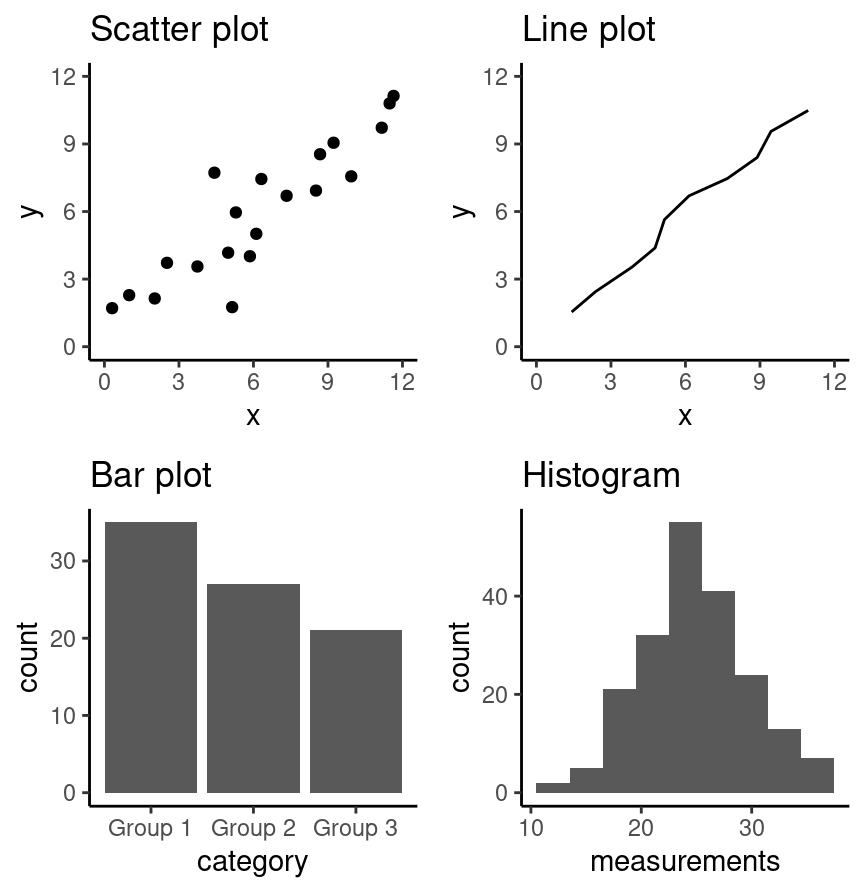

ggplot aspects:
- aesthetic mappings
- geometric objects
- scales

Use the ggplot2 package in R to create and refine the above visualizations using:
- geometric objects: geom_point, geom_line, geom_histogram, geom_bar, geom_vline, geom_hline
- scales: xlim, ylim
- aesthetic mappings: x, y, fill, color, shape
- labeling: xlab, ylab, labs
- font control and legend positioning: theme
- subplots: facet_grid

In [ ]:
# Text scale example
library(scales)

ggplot(can_lang, aes(x = most_at_home, y = mother_tongue)) +
  geom_point() +
  labs(x = "Language spoken most at home \n (number of Canadian residents)",
       y = "Mother tongue \n (number of Canadian residents)") +
  theme(text = element_text(size = 12)) +
  scale_x_log10(labels = label_comma()) +
  scale_y_log10(labels = label_comma())

# text example with legends with colour shape and color palette
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)
ggplot(can_lang, aes(x = most_at_home_percent, 
                     y = mother_tongue_percent, 
                     color = category, 
                     shape = category)) +
  geom_point() +
  labs(x = "Language spoken most at home \n (percentage of Canadian residents)",
       y = "Mother tongue \n (percentage of Canadian residents)") +
  theme(text = element_text(size = 12),
        legend.position = "top",
        legend.direction = "vertical") +
  scale_x_log10(labels = comma) +
  scale_y_log10(labels = comma) +
  scale_color_brewer(palette = "Set2")

We specify that we would like to use a bar plot via the geom_bar function in ggplot2. However, by default, geom_bar sets the heights of bars to the number of times a value appears in a data frame (its count); here, we want to plot exactly the values in the data frame, i.e., the landmass sizes. So we have to pass the stat = "identity" argument to geom_bar


The default label is the name of the column being mapped to fill. Here that would be landmass_type; however landmass_type is not proper English (and so is less readable). Thus we use the fill argument inside labs to change that to “Type.”

In [ ]:
islands_top12 <- slice_max(islands_df, order_by = size, n = 12)
islands_bar <- ggplot(islands_top12, aes(x = size, y = landmass)) +
  geom_bar(stat = "identity") 

islands_bar <- ggplot(islands_top12, 
                      aes(x = size,
                          y = fct_reorder(landmass, size, .desc = TRUE), 
                          fill = landmass_type)) +
  geom_bar(stat = "identity") +
  labs(x = "Size (1000 square mi)", y = "Landmass",  fill = "Type") +
  theme(text = element_text(size = 12))

islands_bar

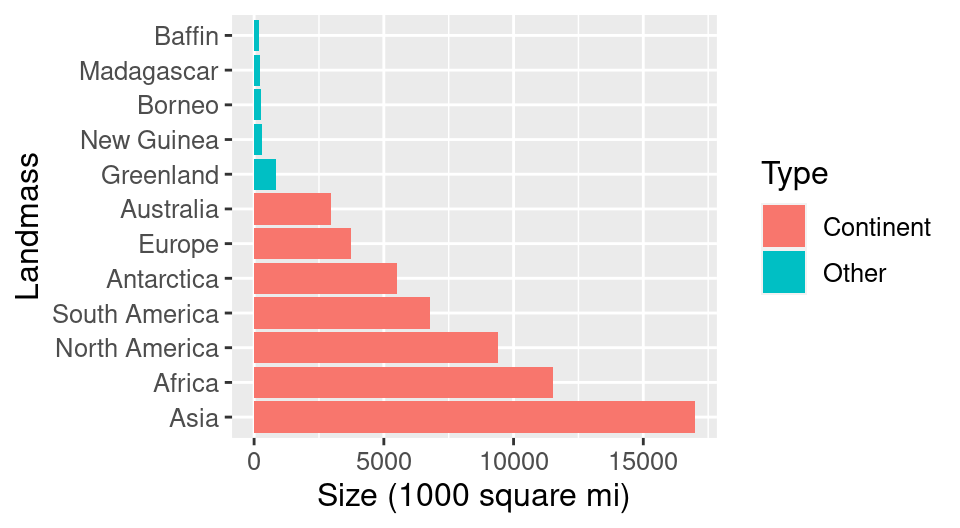

We also specify position = "identity" in geom_histogram to ensure the histograms for each experiment will be overlaid side-by-side, instead of stacked bars (which is the default for bar plots or histograms when they are colored by another categorical variable).

In [ ]:
morley_hist <- ggplot(morley, aes(x = Speed, fill = as_factor(Expt))) +
  geom_histogram(alpha = 0.5, position = "identity") +
  geom_vline(xintercept = 792.458, linetype = "dashed", size = 1.0)

morley_hist

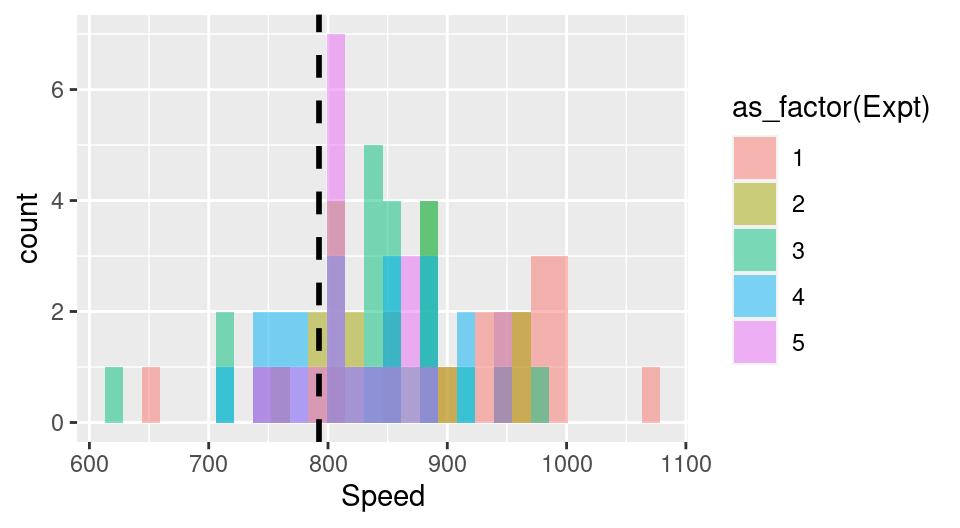

In [ ]:
morley_rel <- mutate(morley, 
                     relative_accuracy = 100 * 
                       ((299000 + Speed) - 299792.458) / (299792.458))

morley_hist <- ggplot(morley_rel, 
                      aes(x = relative_accuracy, 
                          fill = as_factor(Expt))) +
  geom_histogram() +
  facet_grid(rows = vars(Expt)) +
  geom_vline(xintercept = 0, linetype = "dashed", size = 1.0) +
  labs(x = "Relative Accuracy (%)", 
       y = "# Measurements", 
       fill = "Experiment ID") +
  theme(text = element_text(size = 12))

morley_hist

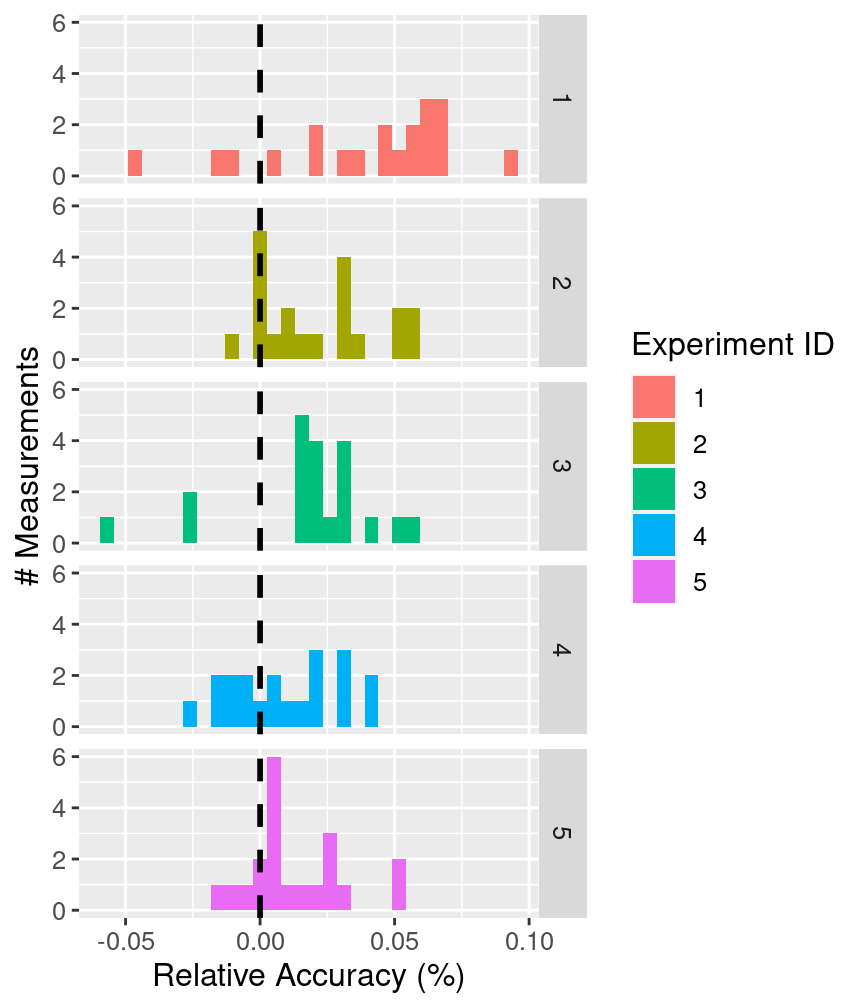

In [2]:
library(tidyverse)
download.file("https://www.stat.cmu.edu/~larry/all-of-statistics/=data/wmap.dat", "wmap.dat")
wmap_dat <- read_delim("wmap.dat", delim = " ", skip = 4)
wmap_dat

Warning message in download.file("https://www.stat.cmu.edu/~larry/all-of-statistics/=data/wmap.dat", :
“URL 'https://www.stat.cmu.edu/~larry/all-of-statistics/=data/wmap.dat': status was 'SSL peer certificate or SSH remote key was not OK'”


ERROR: Error in download.file("https://www.stat.cmu.edu/~larry/all-of-statistics/=data/wmap.dat", : cannot open URL 'https://www.stat.cmu.edu/~larry/all-of-statistics/=data/wmap.dat'


In [3]:
?fct_reorder

fct_reorder {forcats},R Documentation
.f,A factor (or character vector).
".x, .y","The levels of f are reordered so that the values of .fun(.x) (for fct_reorder()) and fun(.x, .y) (for fct_reorder2()) are in ascending order."
.fun,"n summary function. It should take one vector for fct_reorder, and two vectors for fct_reorder2, and return a single value."
...,Other arguments passed on to .fun. A common argument is na.rm = TRUE.
.desc,"Order in descending order? Note the default is different between fct_reorder and fct_reorder2, in order to match the default ordering of factors in the legend."
